### Data Science Case Study

##### Obejective

    We have a beer data set and have to build a machine learning model to predict the overall rating of the beer.

##### Problem description

1. The data set include the column "review/overall" which is a desciding factor for a beer to be good or bad and it ranges between
1.0 - 5.0. 
2. In the data set there are total columns with a indexes, which helps in understanding the column entries.
3. The overall rating can depends on the multiple factors and we have to consider the most valuble features which can help in predicting the rating.
4. Insipiration for the rating may be beer name, beer style and text review.
5. The text review contains the words which can help in understanding the reviews of the peoples, can help in predicting the rating.

##### Steps

1. Import the libraries for data ingetion, manupulation, eplorations and visulaisation.
2. Data ingetion and see the data, how it looks.
3. Perform preliminary operations like info(), columns, description, check % of null values.
4. Check the data types and format it if required.
5. Fill the null values by mean, median or mode if needed and eliminate if not required.
6. Explore the data, visualise it and understand the data.
7. Finaly prepare the data set for the buiding the ML models.
8. Create multiple models and check for the results and compare them. 

        Import the libraries to priliminary analysis of data or preprocessing of data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
beer_data = pd.read_csv('../Data/train.csv')
beer_data.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


        Understanding the data set

In [3]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

        There are total 19 columns in the data set.
        There are few columns which have the null values.
        Data type is correct for the columns.
        user/ageInSeconds contains the age of the people in seconds.

In [4]:
beer_data.shape

(37500, 19)

        19 columns and 37500 rows in the data set

In [10]:
round(beer_data.isna().sum()*100/beer_data.shape[0],2)

index                 0.00
beer/ABV              0.00
beer/beerId           0.00
beer/brewerId         0.00
beer/name             0.00
beer/style            0.00
review/appearance     0.00
review/aroma          0.00
review/overall        0.00
review/palate         0.00
review/taste          0.00
review/text           0.03
review/timeStruct     0.00
review/timeUnix       0.00
user/ageInSeconds    79.05
user/birthdayRaw     79.05
user/birthdayUnix    79.05
user/gender          59.16
user/profileName      0.01
dtype: float64

        reveiw/text - contains the text data and have a few values missing which we can drop later to get the clean data.
        user/ageInSeconds, user/birthdayRaw, user/birthdayUnix - have 79% of missing values.
        user/gender - have 59% of missing values.
        user/profileName - have only few values missing.

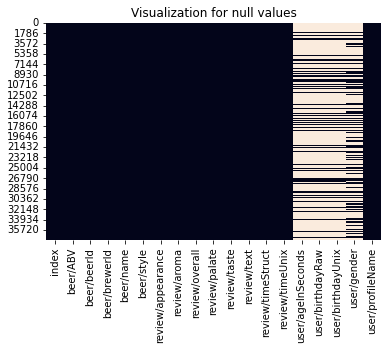

In [48]:
sns.heatmap(beer_data.isnull(), cbar=False)
plt.title('Visualization for null values')
plt.show()

        Heatmap helps in visualising the missing values and white spots in a graph represnts the missing values.

        Understanding the user/ageInseconds column to see how we can fill the null values, wether this column is useful for the further 
        analysis.

In [17]:
# calculate the age of the users in years
beer_data['user/ageInSeconds'] = round(beer_data['user/ageInSeconds']/(365*24*60*60))

In [18]:
beer_data['user/ageInSeconds'].max()

115.0

In [19]:
beer_data['user/ageInSeconds'].min()

22.0

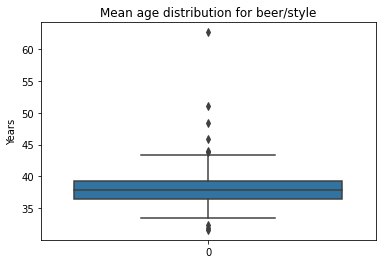

In [47]:
sns.boxplot(data = beer_data.groupby('beer/style')['user/ageInSeconds'].mean())
plt.title('Mean age distribution for beer/style')
plt.ylabel('Years')
plt.show()

In [25]:
beer_data.groupby('beer/style')['user/ageInSeconds'].max()

beer/style
Altbier                        58.0
American Adjunct Lager         71.0
American Amber / Red Ale      114.0
American Amber / Red Lager     51.0
American Barleywine            62.0
                              ...  
Vienna Lager                   39.0
Weizenbock                      NaN
Wheatwine                     114.0
Winter Warmer                  53.0
Witbier                        60.0
Name: user/ageInSeconds, Length: 95, dtype: float64

In [26]:
beer_data.groupby('beer/style')['user/ageInSeconds'].min()

beer/style
Altbier                       27.0
American Adjunct Lager        25.0
American Amber / Red Ale      25.0
American Amber / Red Lager    32.0
American Barleywine           26.0
                              ... 
Vienna Lager                  26.0
Weizenbock                     NaN
Wheatwine                     26.0
Winter Warmer                 27.0
Witbier                       25.0
Name: user/ageInSeconds, Length: 95, dtype: float64

        From the above analysis of age of the user:
        1. The min age of user is 22 and max age of user is 115.
        2. The box plot helps in getting the better insights and gives the distribution of mean age of each beer/style.
        3. The mean value is 38 for each beer style which implies that there is a mix age group of users for the each style.
        4. For the further analysis we can drop the age column because it deosn't look prominent with the current values.
        5. One of the possible reason is that the age column have 79% missing values which makes its impact less over the other variables.

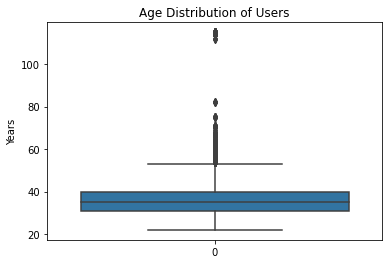

In [46]:
sns.boxplot(data = beer_data['user/ageInSeconds'])
plt.title('Age Distribution of Users')
plt.ylabel('Years')
plt.show()

        user/gender analysis
        user/gender have 59% missing values in a data set

In [56]:
gender_count = beer_data['user/gender'].value_counts().reset_index()

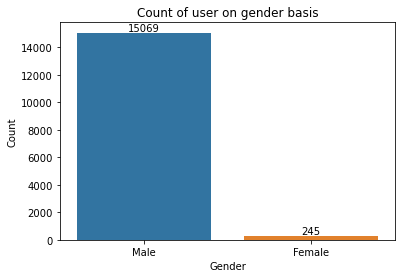

In [55]:
ax = sns.barplot(data = gender_count, x = 'index', y = 'user/gender')
ax.bar_label(ax.containers[0])

plt.title('Count of user on gender basis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [60]:
beer_data.groupby('user/gender')['beer/ABV'].mean()

user/gender
Female    7.404735
Male      7.514201
Name: beer/ABV, dtype: float64

In [65]:
beer_data.groupby('user/gender')[['review/overall','review/appearance', 'review/aroma','review/palate', 'review/taste']].mean()

,review/overall,review/appearance,review/aroma,review/palate,review/taste
user/gender,,,,,
Female,3.989796,3.995918,4.006122,3.957143,4.067347
Male,3.902250,3.909583,3.896675,3.870363,3.941469


        The data set consist the gender based data but the male% is very high as compare to female%.
        The mean value for the alcohol by volume is also almost same.
        The ratings given by the male and female is also be the same.
        So from this analysis we can drop the user/gender column for the detailed analysis.
        We have also seen that there are beer/styles which are prefered by on gender basis, but our objective is to predict the rating,
        so this gender data will not help us.
        

        Droping the columns that will not be useful for the further analysis

In [67]:
beer_data = beer_data.drop(['user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName'], axis = 1)

In [69]:
beer_data.isna().sum()

index                 0
beer/ABV              0
beer/beerId           0
beer/brewerId         0
beer/name             0
beer/style            0
review/appearance     0
review/aroma          0
review/overall        0
review/palate         0
review/taste          0
review/text          10
review/timeStruct     0
review/timeUnix       0
dtype: int64

        review/text column have 10 null values which is very less as compare to avilabel data, so we can drop the null values.

In [70]:
beer_data = beer_data.dropna(subset = ['review/text'])

In [71]:
beer_data.isna().sum()

index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeStruct    0
review/timeUnix      0
dtype: int64

        The data set have no null values

In [72]:
beer_data.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708


In [73]:
# convert the review/timeUnix to datetime
beer_data['review/timeUnix'] = pd.to_datetime(beer_data['review/timeUnix'], unit='s')

beer_data['review_year'] = beer_data['review/timeUnix'].dt.year
beer_data['review_month'] = beer_data['review/timeUnix'].dt.month
beer_data['review_day'] = beer_data['review/timeUnix'].dt.day
beer_data['review_hour'] = beer_data['review/timeUnix'].dt.hour

        Drop the time related columns, index column, beerId, and brewerId to get the clean data and useful data.

In [76]:
beer_data = beer_data.drop(['index','beer/beerId', 'beer/brewerId', 'review/timeStruct', 'review/timeUnix'], axis = 1)
beer_data.head()

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review_year,review_month,review_day,review_hour
0,5.0,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,2008,12,16,3
1,11.0,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,2008,8,8,23
2,4.7,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,2004,11,26,18
3,4.4,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,2011,6,20,1
4,4.4,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,2011,3,12,6


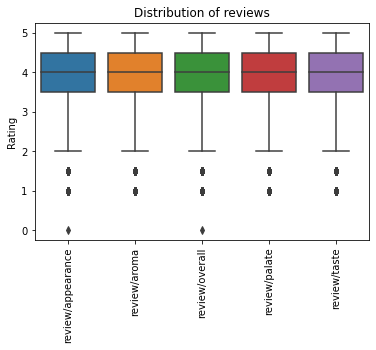

In [80]:
sns.boxplot(data = beer_data[['review/appearance', 'review/aroma', 'review/overall', 'review/palate', 'review/taste']])
plt.title('Distribution of reviews')
plt.ylabel('Rating')
plt.xticks(rotation = 90)
plt.show()

        The visulaisation shows the distribution of data set for the reviews.
        The reviews have a very few outliers which will not affect the results of the model that we are going to develop.

In [84]:
year_data = beer_data['review_year'].value_counts().reset_index()

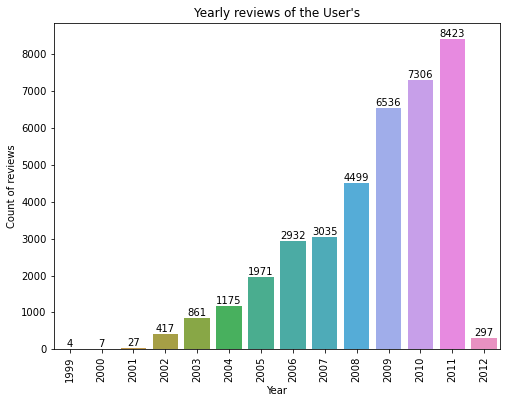

In [96]:
plt.figure(figsize = (8,6))

ax = sns.barplot(data = year_data, x = 'index', y = 'review_year')
ax.bar_label(ax.containers[0])

plt.title("Yearly reviews of the User's")
plt.xlabel('Year')
plt.ylabel('Count of reviews')
plt.xticks(rotation = 90)
plt.show()

        Above visualisation inferes the count of users reviewd the beer.
        The trend show the increment the till the year 2011 and then there is a sudden drop for the year 2012.

In [101]:
month_data = beer_data['review_month'].value_counts().reset_index()

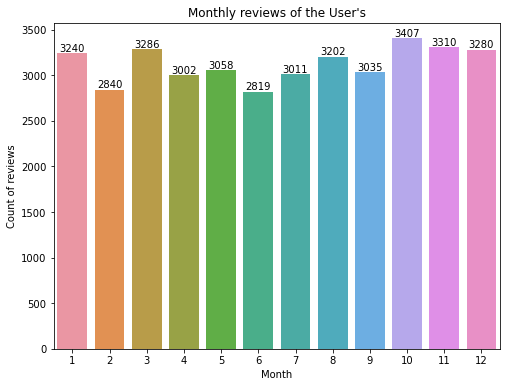

In [102]:
plt.figure(figsize = (8,6))

ax = sns.barplot(data = month_data, x = 'index', y = 'review_month')
ax.bar_label(ax.containers[0])

plt.title("Monthly reviews of the User's")
plt.xlabel('Month')
plt.ylabel('Count of reviews')

plt.show()

In [121]:
grouped_data = beer_data.groupby('beer/name').agg(style_count = ('beer/style', 'count')).reset_index()
maxstyle_beer_name = grouped_data.sort_values('style_count', ascending = False).head(15)

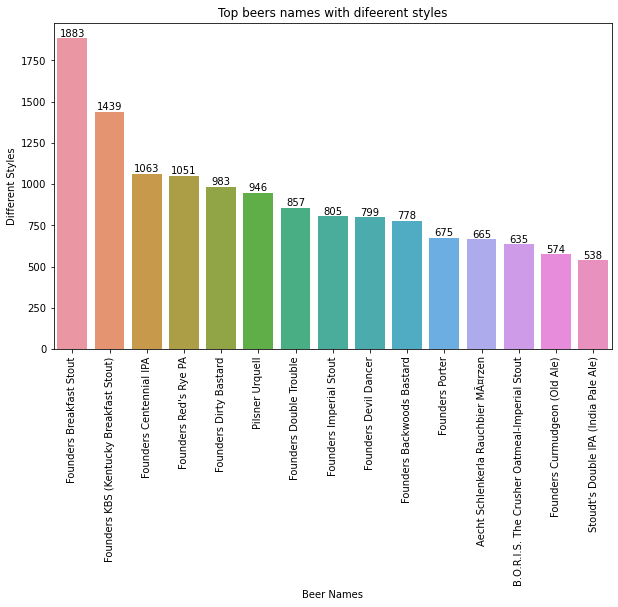

In [122]:
plt.figure(figsize = (10,6))

ax = sns.barplot(data = maxstyle_beer_name, x = 'beer/name', y = 'style_count')
ax.bar_label(ax.containers[0])

plt.title("Top beers names with difeerent styles")
plt.xlabel('Beer Names')
plt.ylabel('Different Styles')
plt.xticks(rotation = 90)
plt.show()

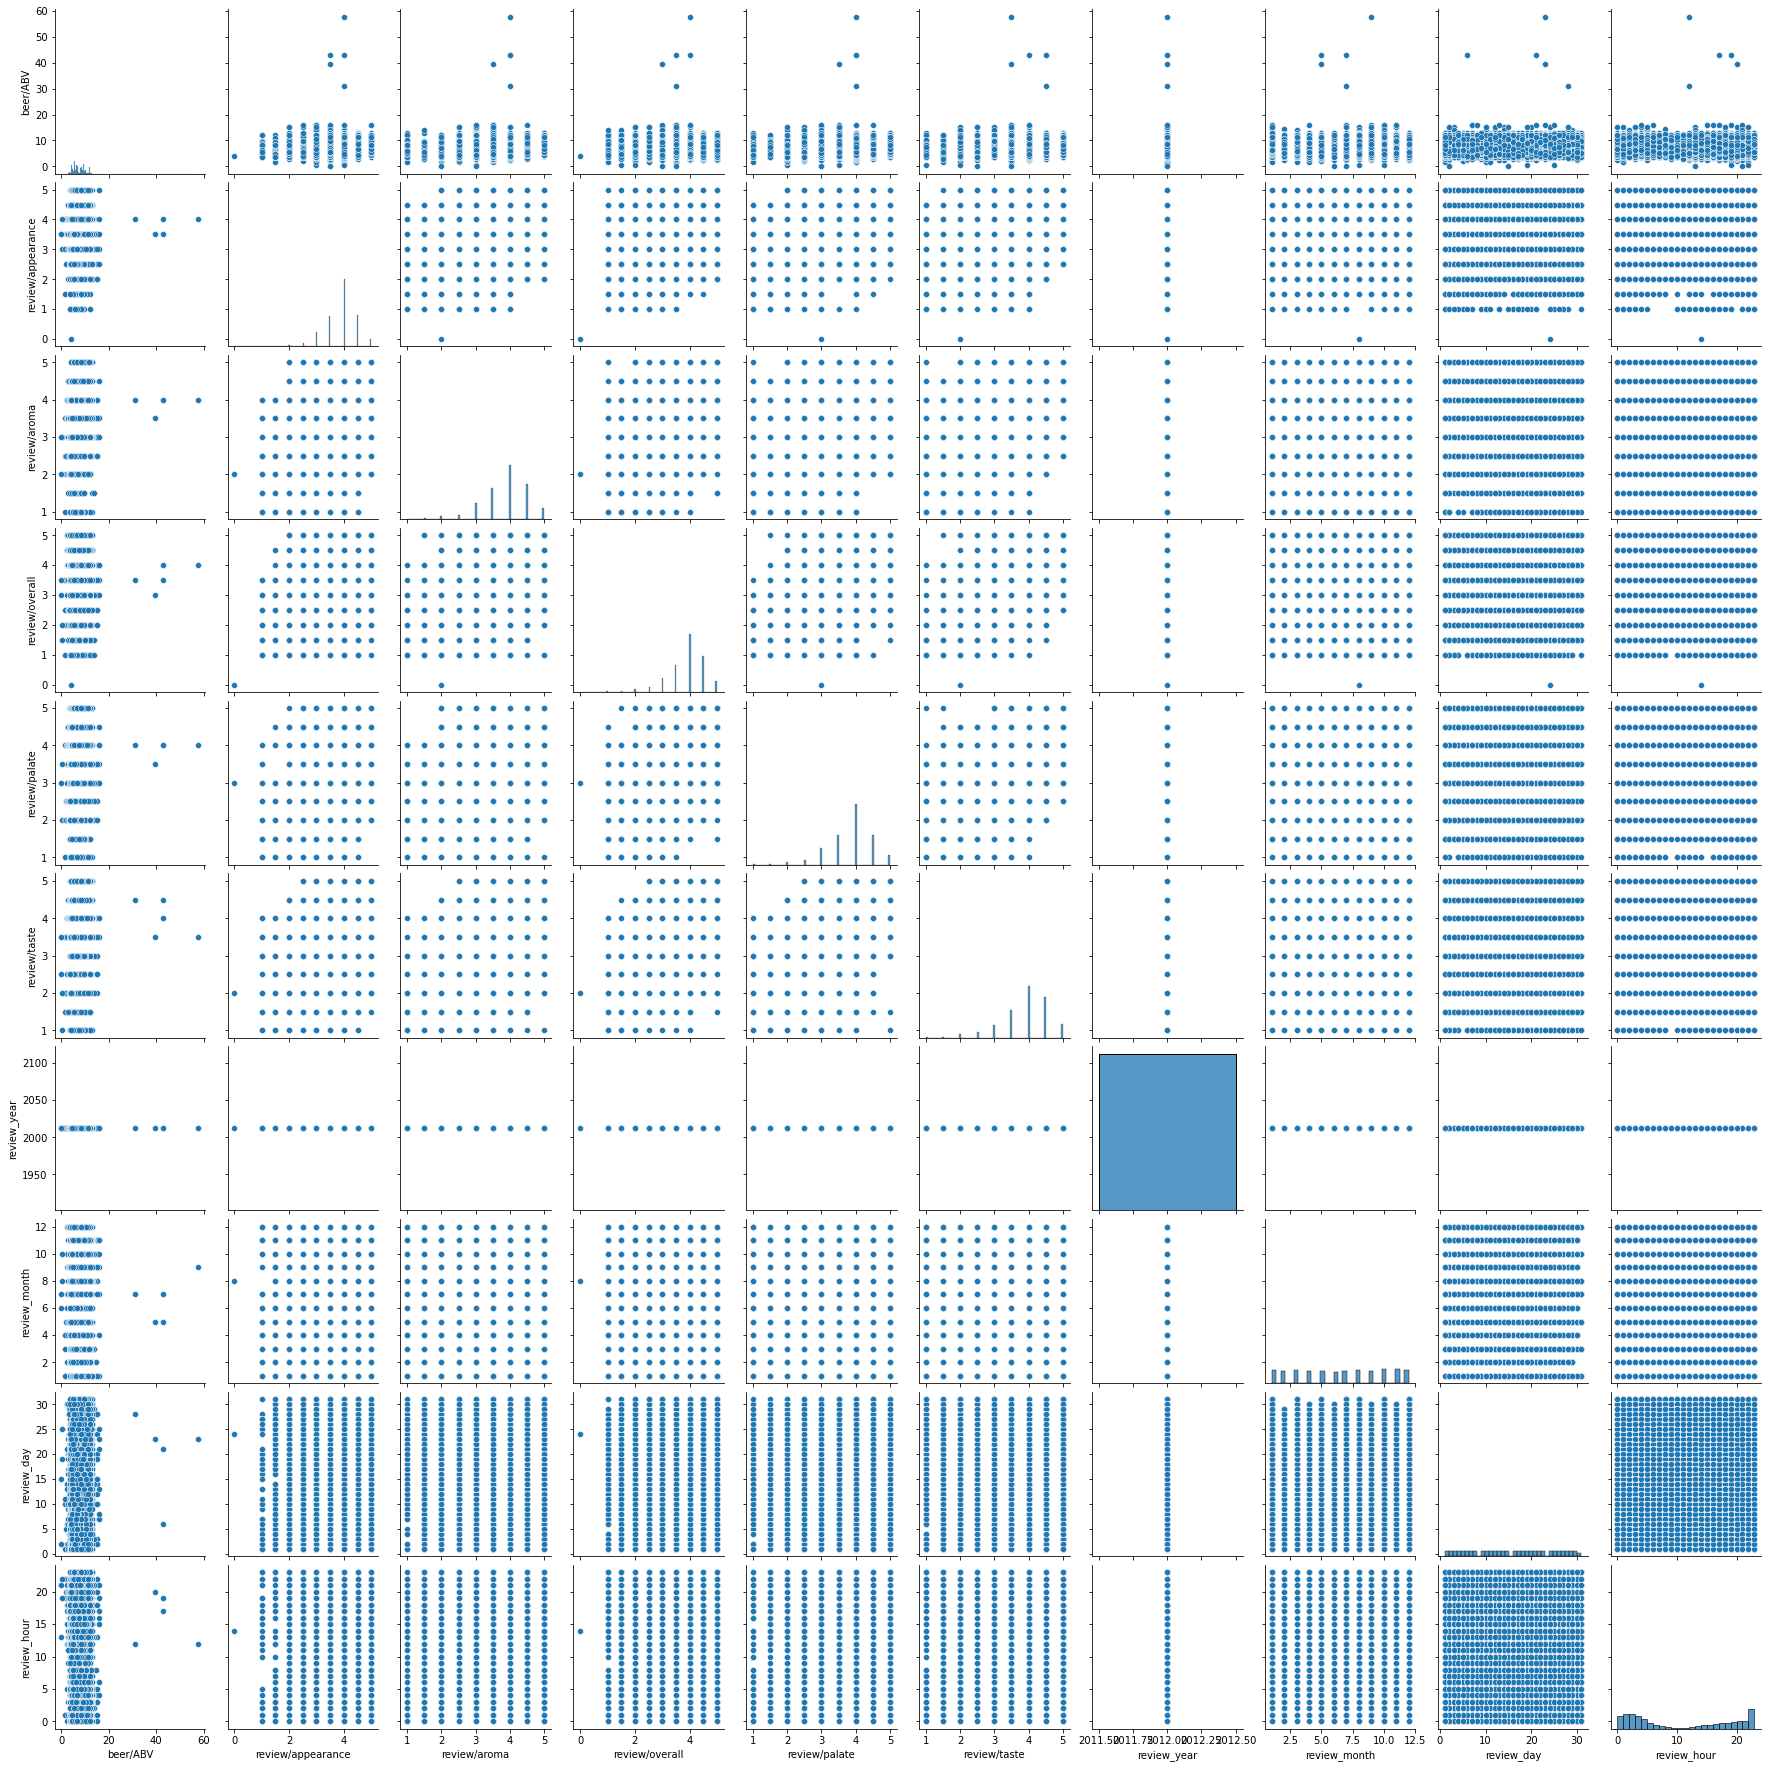

In [123]:
sns.pairplot(data = beer_data)
plt.show()

        From the above visualisation, we can infer that there is no such relationship between the numerical columns.
        Every column is independent and can be cosidered as a feature for developing the model.

##### Building Machine Learning Models

        Final objective is to predict the overall rating correctly or with a high accuracy or with minimum error.
        Building a model, training, testing and evaluating the model.
        Before building the model, it is good to know which type of problem it is either classification, regression or clustering.
        The problem statement states that build a predictive model for overall rating. 
        Rating have a scale 1-5 which makes it to be a classification based problem.
        So I am going to use the classification model.
        In classification we have Logistic Regression, Random Forest Classifier, Decision Tree.

        User's are giving a rating for the each beer/style and beer/name.
        The ratings are given as a numerical values between 1-5, but they are also giving the text reviews also.
        Text reviews are also helpful in predicting the overall rating correctly.
        Firstly I will convert the review/text column 'text' values to categorical data using the Sentiment Analysis.
        I will categories the column text values in a category of 'Excellent', 'Good', 'Average', and 'Bad'.
        Where 'Excellent' will be for the best text reviews and 'Bad' will be for the worst text reviews.
        

In [232]:
## Import the sentiment analyzer vader for the sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [233]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [234]:
# Defining a function to categories the text values in a groups
def categorize_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    if compound_score > 0.6:
        return 'Excellent'
    elif compound_score > 0.3:
        return 'Good'
    elif compound_score > -0.3:
        return 'Average'
    else:
        return 'Bad'

In [235]:
# Apply the function over review/text column
beer_data['review_category'] = beer_data['review/text'].apply(categorize_sentiment)

In [237]:
beer_data['review_category'].value_counts()

Excellent    31664
Good          2169
Average       1943
Bad           1714
Name: review_category, dtype: int64

        Using the OnHotEncoding to convert this categorical data to numerical values.

In [238]:
# Import OneHotEncoder model
from sklearn.preprocessing import OneHotEncoder

In [239]:
# Activate the model and transform the review_category to numrical values
ohe = OneHotEncoder()
text_encoded = ohe.fit_transform(beer_data[['review_category']])

In [241]:
text_encoded.shape 

(37490, 4)

        The data set have a 10 columns with a numerical values, for few columns value lies between 1-5.
        For the other column it varies and when we train the model with such a values, it can overfit.
        To overcome this we will use standardisation to convert the scale of data to common scale.
        The mean for every column will become 0 and standard deviation be 1.


In [242]:
# Import the standard scler model 
from sklearn.preprocessing import StandardScaler

In [243]:
# Activate the model
scaler = StandardScaler()

In [244]:
# Fit and transform the data
scaler.fit(beer_data[['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste','review_year', 
                      'review_month', 'review_day', 'review_hour']])
df1 = scaler.transform(beer_data[['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste','review_year', 
                      'review_month', 'review_day', 'review_hour']])

In [246]:
# converting the transformed array to an data frame to see the data with clear understanding
df2 = pd.DataFrame(df1)
df2.head()

,0,1,2,3,4,5,6,7,8
0,-1.036823,0.169957,0.186365,0.217528,0.108486,0.0,1.551607,0.036616,-0.867630
1,1.551636,0.169957,-0.548085,-0.530992,-1.287236,0.0,0.405642,-0.870907,1.492193
2,-1.166246,-0.679376,0.186365,-0.530992,-0.589375,0.0,1.265115,1.171020,0.902238
3,-1.295669,-1.528709,-1.282534,-1.279511,-1.287236,0.0,-0.167340,0.490378,-1.103612
4,-1.295669,0.169957,-1.282534,-0.530992,-1.985096,0.0,-1.026813,-0.417145,-0.513657


In [254]:
# Combine all features to get the final input and output data aka X
numerical_features = df2.values

X = np.hstack((text_encoded.toarray(), numerical_features))

In [255]:
X.shape

(37490, 13)

        Input variables are 9 numerical columns and 4 being encoded from the text based data

        For splitting the data set into train and test data for model.
        Import the model train_test_split.
        Import the model LinearRegression.
        Import the model RandomForestClassifier.
        Import the model for evaluating the performance of the model. 

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

        Logistic Regression is a binary classification model but the problem is multiclass classification.
        So with certain hacks we can use the logistic regression with multiclass classification problem.

        Before applying the logictic regression the output data 'review/overall' to convert as a category.
        So convert the data set into a category using the bins.

In [377]:
# Bins are 'bad' => [0-1), 'average' => [1-2.5), 'good' => [2.5-5)
bins = [0, 1, 2.5, 5]
labels = ['Bad', 'Average', 'Good']
beer_data['overall_category'] = pd.cut(beer_data['review/overall'], bins=bins, labels=labels, include_lowest=True)

In [378]:
# defining the y variable as a catagorical for the classification problem
y = beer_data['overall_category']

In [379]:
# split the data set into trainig and test data in ration 30:70
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [380]:
# Activate and train the model
lor = LogisticRegression(max_iter=300, random_state=42)
lor.fit(X_train, y_train)

LogisticRegression(max_iter=300, random_state=42)

In [381]:
# predicted the Y values and evaluate the model
y_pred_lor = lor.predict(X_test)
accuracy_lor = accuracy_score(y_test, y_pred_lor)
classification_rep_lor = classification_report(y_test, y_pred_lor)

In [382]:
print(f"Accuracy score of LOR: {accuracy_lor}")

Accuracy score of LOR: 0.960599016880692


        Classification model works with the accuracy of 96%

In [383]:
print(classification_rep_lor)

              precision    recall  f1-score   support

     Average       0.74      0.56      0.64      1602
         Bad       0.65      0.30      0.41       133
        Good       0.97      0.99      0.98     24508

    accuracy                           0.96     26243
   macro avg       0.78      0.62      0.68     26243
weighted avg       0.96      0.96      0.96     26243



        1. Overall Performance: With an accuracy of 0.96, the model seems to be performing well on the dataset.
        2. Class Imbalance: However, there's a significant imbalance between the number of "Bad" 133 and "Good" 24508 samples. 
        3. "Good" Class: The model performs very well on the majority class ("Good") with high precision 0.97 and recall 0.99.
        4. "Bad" Class: The performance on the minority class "Bad" is considerably lower, with lower precision 0.65 and recall 
           0.30. This means the model might be struggling to identify "Bad" samples accurately and might be making more false 
           positives (predicting "Bad" when it's actually "Good").
        5. The average F1-score 0.64 reflects the trade-off between precision and recall, considering the class imbalance. 
           It suggests the model prioritizes high accuracy on the majority class but might miss some true positives in the minority class.

        Building the Random Forest Classifier

In [384]:
# Activate the RandomForestClassifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [385]:
# train the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [386]:
# predict the values and evluate the model
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
classification_rep_rfc = classification_report(y_test, y_pred_rfc)

In [387]:
print(f"Accuracy of RandomForestClassifier: {accuracy_rfc}")

Accuracy of RandomForestClassifier: 0.9585413253057958


In [388]:
print(classification_rep_rfc)

              precision    recall  f1-score   support

     Average       0.69      0.59      0.63      1602
         Bad       0.83      0.26      0.40       133
        Good       0.97      0.99      0.98     24508

    accuracy                           0.96     26243
   macro avg       0.83      0.61      0.67     26243
weighted avg       0.96      0.96      0.96     26243



        1. Overall Performance: The model achieves a high overall accuracy of 0.96, indicating good performance on the entire dataset.
        2. Class Imbalance: There's a significant class imbalance with many more "Good" samples 24508 compared to "Bad" samples 133.
        3. "Good" Class: The model performs exceptionally well on the majority class "Good" with high precision 0.97 and recall 0.99.
        4. "Bad" Class: However, the performance on the minority class "Bad" is lower. While precision improved to 0.83 (meaning the model
           is better at avoiding false positives for "Bad"), recall remains low at 0.26. This suggests the model might still miss many 
           true positive "Bad" cases, classifying them as "Good." This could be due to the class imbalance.
        5. F1-Score: The average F1-score 0.63 is lower than before, reflecting the trade-off between precision and recall and the 
           model struggle with the minority class.

        Overall both the models works with the 96% accuracy!!!

##### The End!!